In [9]:
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [10]:
#create a sample dataset
np.random.seed(0)
n_samples = 18
n_features = 6
x = np.random.randn(n_samples,n_features)

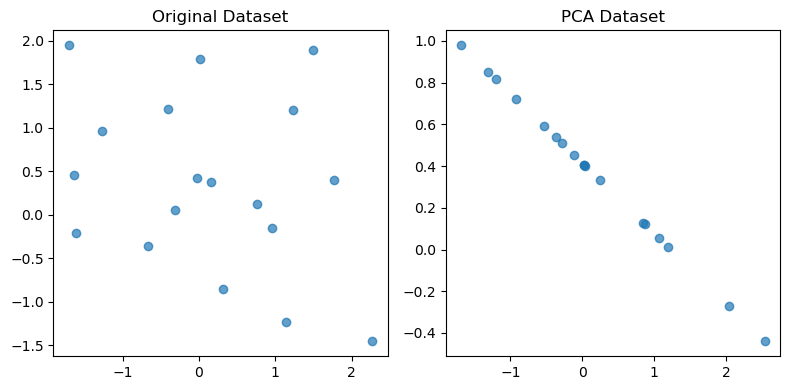

In [15]:
#initialize PCA with the desitred number of components 
n_components = 1
pca=PCA(n_components=n_components)

#fit PCA on the data and transform it 
x_pca = pca.fit_transform(x)

#inverse transform to get the projected data back into the original space
x_original = pca.inverse_transform(x_pca)

#plot the original data and the pca reconstructed data
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],alpha=0.7)
plt.title("Original Dataset")

plt.subplot(1,2,2)
plt.scatter(x_original[:,0],x_original[:,1],alpha=0.7)
plt.title("PCA Dataset")

plt.tight_layout()
plt.show()


KMeans

/home/nimish-grover/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


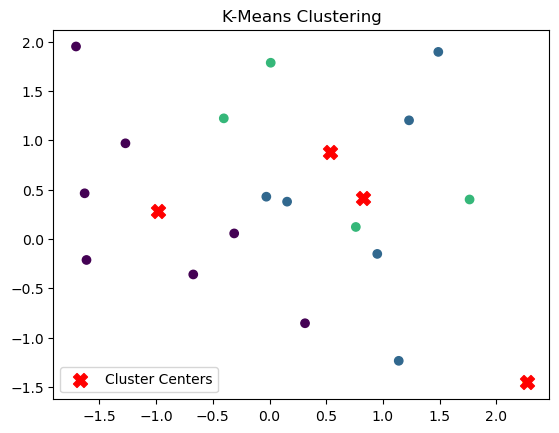

In [20]:
data = x
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

#plot the data points and cluster center 
plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='red',marker='X',s=100,label='Cluster Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

K-Means on text data

In [16]:
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/nimish-
[nltk_data]     grover/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nimish-
[nltk_data]     grover/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/nimish-grover/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


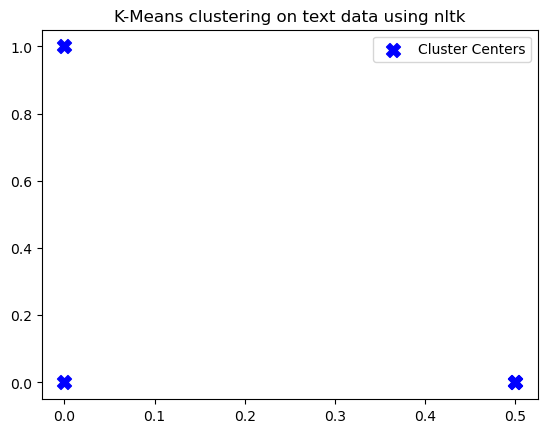

In [18]:
nltk.download('stopwords')
nltk.download('punkt')
text_data = [
    "A matrix containing the covariance between the pair of variables is called the Covariance Matrix",
    "If there is a square matrix M, and a non-zero vector v is given.",
    "Remove less or unimportant features from the new dataset.",
    "Calculating the new features Or Principal Components",
    "Calculating the Eigen Values and Eigen Vectors",
    "Representing data into a structure"
]

def preprocess_text(text_data):
    stop_words=set(stopwords.words('english'))
    preprocessed_data=[]
    for text in text_data:
        words = word_tokenize(text.lower())
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
        preprocessed_data.append(filtered_words)
    return preprocessed_data

preprocessed_data=preprocess_text(text_data)

unique_words = sorted(set(word for sublist in preprocessed_data for word in sublist))
one_hot_vectors = np.zeros((len(preprocessed_data),len(unique_words)))
for i,words in enumerate(preprocessed_data):
    for word in words:
        one_hot_vectors[i,unique_words.index(word)] = 1

k=4

kmeans=KMeans(n_clusters=k)


kmeans.fit(one_hot_vectors)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(centers[:,0],centers[:,1],c='blue',marker='X',s=100,label = 'Cluster Centers')
plt.title("K-Means clustering on text data using nltk")
plt.legend()
plt.show()
